In [1]:
%%javascript
var width = window.innerWidth || document.documentElement.clientWidth || document.body.clientWidth;
var height = window.innerHeight || document.documentElement.clientHeight || document.body.clientHeight;

IPython.notebook.kernel.execute("windowSize = (" + width + "," + height + ")");
// suitable for small screens
nbpresent.mode.tree.set(
    ["app", "theme-manager", "themes", "my-theme"], 
    {
    palette: {
        "blue": { id: "blue", rgb: [0, 153, 204] },
        "black": { id: "black", rgb: [0, 0, 0] },
        "white": { id: "white", rgb: [255, 255, 255] },
        "red": { id: "red", rgb: [240, 32, 32] },
        "gray": { id: "gray", rgb: [128, 128, 128] },
    },
    backgrounds: {
        "my-background": {
            "background-color": "white"
        }
    },
    "text-base": {
        "font-family": "Georgia",
        "font-size": 2.5
    },
    rules: {
        h1: {
            "font-size": 5.5,
            color: "blue",
            "text-align": "center"
        },
        h2: {
            "font-size": 3,
            color: "blue",
            "text-align": "center"
        },
        h3: {
            "font-size": 3,
            color: "black",
        },
        "ul li": {
            "font-size": 2.5,
            color: "black"
        },
        "ul li ul li": {
            "font-size": 2.0,
            color: "black"
        },
        "code": {
            "font-size": 1.6,
        },
        "pre": {
            "font-size": 1.6,
        }
    }
});

<IPython.core.display.Javascript object>

# Hidden Markov Models

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L24Tshirt.jpg" width="400px">

<p style="text-align: right; clear: right;">1</p>

# Dinucleotide Frequency

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/CGseascape.jpg" width="400px" style="float: right; margin: 0px 20px 0px 20px;">
* Consider all 2-mers in a sequence<br>{AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT}
* Given 4 nucleotides: each with a probability of occurrence of $\approx \frac{1}{4}$.<br>Thus, one would expect that the probability of occurrence of any given dinucleotide is $\approx \frac{1}{16}$.
* However, the frequencies of dinucleotides in DNA sequences vary widely.
* In particular, CG is typically underepresented<br> (frequency of CG is typically < $\frac{1}{16}$)

<p style="text-align: right; clear: right;">2</p>

# Example

* From a 291829 base sequence
<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L24DimerFreq.png" width="450px">

* Expected value 0.0625
* CG is 7 times smaller than expected

<p style="text-align: right; clear: right;">3</p>

# Why so few CGs?

* CG is the least frequent dinucleotide because C in CG is easily *methylated*. And, methylated Cs are easily mutated into Ts.
<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L24Methylation.png" width="600px">
* However, methylation is suppressed around genes and transcription factor binding sites
* So, CG appears at relatively *higher* frequency in these important areas
* These localized areas of higher CG frequency are called ***CG-islands***
* Finding the CG islands within a genome is among the most reliable gene finding approaches

<p style="text-align: right; clear: right;">4</p>

# CG Island Analogy

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L24Dealer.png" style="float: right; margin: 0px 50px 0px 50px;">
* The CG islands problem can be modeled by a toy problem named<br> ***"The Fair Bet Casino"***
* The outcome of the game is determined by coin flips with two possible outcomes: Heads or Tails
* However, there are two different coins
   - A **F**air coin:<br>**H**eads and **T**ails with same probability $\frac{1}{2}$.
   - The **B**iased coin:<br>**H**eads with prob. $\frac{3}{4}$,<br>**T**ails with prob. $\frac{1}{4}$.

<p style="text-align: right; clear: right;">5</p>

# The "Fair Bet Casino"

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L24CoinFlip.png" width="200px" style="float: right; margin: 0px 150px 0px 50px;">
* Thus, we define the probabilities:<br><br>
    - $P(H|Fair) = \frac{1}{2},\quad P(T|Fair) = \frac{1}{2}$
    - $P(H|Bias) = \frac{3}{4},\quad P(T|Bias) = \frac{1}{4}$<br><br>
* The house doesn’t want to get caught switching between coins, so they do so infrequently
* Changes between Fair and Biased coins occur with probability  10%

<p style="text-align: right; clear: right;">6</p>

# Fair Bet Casino Problem
* **Input:** A sequence $x = x_1, x_2, x_3, \dots, x_n$ of observed coin tosses made by some combination of the two possible coins (**F** or **B**).
 
* **Output:** A sequence $\pi = \pi_1,\pi_2,\pi_3,\dots, \pi_n$, with each $\pi_i$ being either **F** or **B** indicating that $x_i$ is the result of tossing the Fair or Biased coin respectively.

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L24CoinFlips.png" width="500px">

<p style="text-align: right; clear: right;">7</p>

# Problem Subtleties

* Any observed outcome of coin tosses *could* have been generated by *any combination* of coin exchanges
* However, all coin-exchange combinations are not equally likely.

       Tosses: T H H H H
       Coins1: F F F F F    P(Tosses|Coins1) = 1/2 1/2 1/2 1/2 1/2 = 1/32 = 0.03125
       Coins2: B B B B B    P(Tosses|Coins2) = 1/4 3/4 3/4 3/4 3/4 =  81/1024 = 0.0791
       Coins3: F F B B B    P(Tosses|Coins3) = 1/2 1/2 3/4 3/4 3/4 = 81/256 = 0.3164

* We ask, "What ***coin-exchange combination*** has the highest probability of generating the observed series of tosses?"
* The coin tosses are a signal, and figuring out the most likely coin-exchange sequence is a *Decoding Problem*

<p style="text-align: right; clear: right;">8</p>

# Let's consider the extreme cases

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/SameCoin.jpg" width="150px" style="float: right; margin: 0px 100px 0px 20px;">
* Suppose that the dealer *never* exchanges coins. 
* Some definitions:
   - *P(x|Fair)*: prob. of generating the *x* using the Fair coin.
   - *P(x|Biased)*: prob. of generating *x* using the Biased coin .

<p style="text-align: right; clear: right;">9</p>

# P(x|fair coin) vs. P(x|biased coin)

$$P(x|Fair) = P(x_1 … x_n|Fair) = \prod_{i=1,n} p(x_i|Fair) = \left(\frac{1}{2}\right)^n$$


$$P(x|Biased) = P(x_1 … x_n|Biased) = \prod_{i=1,n} p (x_i|Biased) = \left(\frac{3}{4}\right)^k \left(\frac{1}{4}\right)^{n-k} = \frac{3^k}{4^n}$$



* Where *k* is the number of **H**eads observed in *x*
<p style="text-align: right; clear: right;">10</p>

# P(x|Fair coin) = P(x|Biased coin)

* When is a sequence equally likely to have come from the Fair or Biased coin?

$$\begin{align}
P(x|Fair) &= P(x|Biased)\\
\left(\frac{1}{2}\right)^n &= \frac{3^k}{4^n}\\ 
2^n &= 3^k\\
n &= k \log_23
\end{align}$$


* when $k = \frac{n}{\log_23}\qquad (k \approx 0.63 n)$
* So when the number of heads over a contiguous sequence of tosses is greater than 63% the dealer is most likely used the biased coin

<p style="text-align: right; clear: right;">11</p>

# Log-odds Ratio

* We can define the log-odds ratio as follows:

$$\begin{align}
\log_2\left(\frac{P(x|Fair)}{P(x|Biased)}\right) &= \sum_{i=1}^k \log_2\left(\frac{P(x_i|Fair)} {P(x_i|Biased)}\right)\\ 
&= n – k \log_23
\end{align}$$

* The log-odds ratio is a means (threshold) for deciding which of two alternative hypotheses is most likely
* *"Zero-crossing"* measure:
    - If the log-odds ratio is > 0 then the numerator (Fair coin) is more likely
    - if the log-odds ratio is < 0 then the denominator (Biased coin) is more likely
    - They are equally likely if the log-odds ratio = 0

<p style="text-align: right; clear: right;">12</p>

# Log-odds over a sliding window

* Given a sequence of length *n*, consider the log-odds ratio of a sliding window of length *w << n*
$$
x_1,x_2,\underline{x_3,x_4,x_5,x_6,x_7},x_8,x_9, \dots x_n
$$

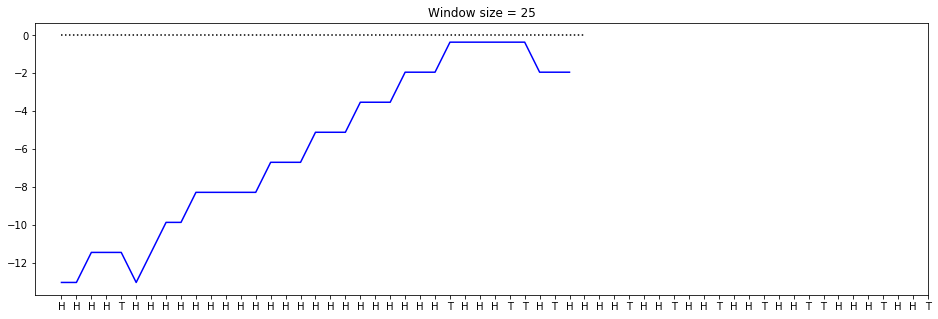

In [3]:
import numpy
import matplotlib.pyplot as plot
%matplotlib inline

rolls = "HHHHTHHHHHHHHHHHHHHHHHHHHHTHHHTTHTHHHHTHHTHHTHHTHHTTHHHTHHT"

w = 25
slope = numpy.log2(3)
y = [w - slope*rolls[i:i+w].count('H') for i in xrange(len(rolls)-w+1)]
x = range(len(y))

fig, ax = plot.subplots(figsize=(16,5))
plot.title("Window size = %d" % w)
plot.hlines(0, 0, len(x), linestyles='dotted')
plot.plot(x,y,'b')
ax.set_xticks([i for i in xrange(len(rolls))])
result = ax.set_xticklabels([c for c in rolls])

Disadvantages:
- The length of CG-island (appropriate window size) is not known in advance
- Different window sizes may classify the same position differently
- What about the rule that they don't swap out the coins frequently?

<p style="text-align: right; clear: right;">13</p>

# Key Elements of the Problem

* There is an unknown or *hidden* state for each observation (Was the coin the Fair or Biased?)
* Outcomes are modeled probabilistically:
    - $P(H|Fair) = \frac{1}{2},\quad P(T|Fair) = \frac{1}{2}$
    - $P(H|Bias) = \frac{3}{4},\quad P(T|Bias) = \frac{1}{4}$
* Transitions between states are modeled probabilistically:
    - $P(\pi_i = Bias\ |\ \pi_{i-1} = Bias) = a_{BB} = 0.9$
    - $P(\pi_i = Bias\ |\ \pi_{i-1} = Fair) = a_{FB} = 0.1$
    - $P(\pi_i = Fair\ |\ \pi_{i-1} = Bias) = a_{BF} = 0.1$
    - $P(\pi_i = Fair\ |\ \pi_{i-1} = Fair) = a_{FF} = 0.9$
    
<p style="text-align: right; clear: right;">14</p>

# Hidden Markov Model (HMM)

* A generalization of this class of problem
* Can be viewed as an abstract machine with *k hidden* states that emits symbols from an alphabet Σ.
* Each state emits outputs with its own probability distribution, and the machine switches between states according to some other probability distribution.
* While in a certain state, the machine makes 2 decisions:
   - What symbol from the alphabet Σ should I emit?
   - What state should I move to next?

<p style="text-align: right; clear: right;">15</p>

# Why "Hidden"?

* Observers see the emitted symbols of an HMM but cannot see which state the HMM is currently in.
* Thus, the goal is to infer the most likely hidden states of an HMM based on the given sequence of emitted symbols.

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L24GuessState.png">

<p style="text-align: right; clear: right;">16</p>

# HMM Parameters

* **Σ**: set of emission characters.<br>Example: Σ = {0, 1} for coin tossing 
    - (0 for Tails and 1 Heads)
    - Σ = {1, 2, 3, 4, 5, 6} for dice tossing


* **Q**: set of hidden states, emitting symbols from Σ.<br>Q = {Fair,Bias} for coin tossing

<p style="text-align: right; clear: right;">17</p>

# HMM for Fair Bet Casino

* The Fair Bet Casino in HMM terms:
	- Σ = {0, 1} (0 for Tails and 1 Heads)
	- Q = {F,B} – F for Fair & B for Biased coin
    
* Transition Probabilities *A*, Emission Probabilities *E*

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L24TransitionEmission.png">
<p style="text-align: right; clear: right;">18</p>

# HMM as a Graphical Model

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L24GraphicalModel.png">

* Directed graph with two types nodes and two types of edges
   - hidden states are shown as squares
   - emission outputs are shown as circles
   - transition edges
   - emission edges

<p style="text-align: right; clear: right;">19</p>

# Hidden Paths

* A path **π** = π<sub>1</sub>… π<sub>n</sub> in the HMM is defined as a sequence of hidden states.
* Consider
    - path π = FFFBBBBBFFF
    - sequence x = 01011101001

$$\begin{matrix}
  x & = & 0 & 1 & 0 & 1 & 1 & 1 & 0 & 1 & 0 & 0 & 1\\
\pi & = & F & F & F & B & B & B & B & B & F & F & F\\
P(x_i|\pi_i) & & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{3}{4} & \frac{3}{4} & \frac{3}{4} & \frac{1}{4} & \frac{3}{4} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2}\\
P(\pi_i \rightarrow \pi_{i+1}) & & \frac{9}{10} & \frac{9}{10} & \frac{1}{10} & \frac{9}{10} & \frac{9}{10} & \frac{9}{10} & \frac{9}{10} & \frac{1}{10} & \frac{9}{10} & \frac{9}{10} & \\
\end{matrix}$$

* What is the probability of the given path (<code>FFFBBBBBFFF</code>)?

<p style="text-align: right; clear: right;">20</p>

# P(x|&pi;) calculation

* **P(x|π):** Probability that sequence *x* was generated by the path *π*:

$$\begin{align}
P(x|\pi) &= \prod_{i=1}^{n} P(x_i| \pi_i) \cdot P(\pi_i \rightarrow \pi_{i+1})\\
 &= \prod_{i=1}^{n} E_{\pi_i,x_i} \cdot A_{\pi_i, \pi_{i+1}}
\end{align}$$

* How many such paths exist? $2^n$
* What algorithmic approach would you use to find the best path? Branch and Bound? Divide and Conquer? Dynamic Programming?

<p style="text-align: right; clear: right;">21</p>

# Decoding Problem

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L24Constellation.jpg" width="300px" style="float: right; margin: 0px 50px 0px 50px;">

Finding the optimal path in a graph is equivalent to a classical problem of decoding a message using *constellations*. This is very commonly used when a discrete set of symbols is encoded for transport over an analog medium (e.x. modems, wired internet, wireless internet, digital television).

A simple binary coding does not make good use of the dynamic range of a digital signal, however, if you put the codes too close noise becomes a problem.

* **Goal:** Find an optimal hidden path of state transitions given a set of observations.
* **Input:** Sequence of observations x = x1…xn generated by an HMM M(Σ, Q, A, E)
* **Output:** A path that maximizes P(x|π) over all possible paths π.

<p style="text-align: right; clear: right;">22</p>

# How do we solve this?

* Brute Force approach:
    * Enumerate every possible path
    * Compute P(x1..n|π1..n) for each one
    * Keep track of the most probable path

* A better approach:
    * Break any path in two parts, $P(x_{1..i}|\pi_{1..i}), P(x_{i..n}|\pi_{i..n})$
    * $P(x_{1..n}|\pi_{1..n}) = P(x_{1..i}|\pi_{1..i}) \times P(x_{i..n}|\pi_{i..n})$
    * Will less than the highest $P(x_{1..i}|\pi_{1..i})$ ever improve the total probability?
    * Thus to find the maximum $P(x_{1..n}|\pi_{1..n})$ we need find the maximum of each subproblem $P(x_{1..i}|\pi_{1..i})$, for i from 1 to n
    * What algorithm design approach does this remind you of?

<p style="text-align: right; clear: right;">23</p>

# Building Manhattan for Decoding

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L24ViterbiHeadshot.jpg" width="240px" style="float: right; margin: 0px 50px 0px 50px;">
* In 1967, Andrew Viterbi developed a “Manhattan-like grid” (Dynamic program) model to solve the Decoding Problem.
* Every choice of $\pi = \pi_1,\pi_2, \dots \pi_n$ corresponds to a path in the graph.
* The only valid direction in the graph is eastward.
* This graph has $|Q|^2 (n-1)$ edges.

<p style="text-align: right; clear: right;">24</p>

# Edit Graph for Decoding Problem

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L24ViterbiGraph.png">

<p style="text-align: right; clear: right;">25</p>

# Viterbi Decoding of Fair-Bet Casino

* Each vertex represents a possible state at a given position in the output sequence
* The observed sequence conditions the likelihood of each state
* Dynamic programming reduces search space to:<br> |Q|+transition_edges×(n-1) = 2+4×5 from naïve 2<sup>6</sup>

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L24FairCasinoViterbi.png">

<p style="text-align: right; clear: right;">26</p>

# Decoding Problem Solution

* The *Decoding Problem* is equivalent to finding a longest path in the *directed acyclic graph* (DAG), where "longest" is defined as the maximum product of the probabilities along the path.

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L24FairCasinoViterbi.png">

<p style="text-align: right; clear: right;">27</p>

# Next Time

* We'll find the DP recurrance equations
* See examples and what it looks like in code
* See how truth and maximum likelihood do not always agree
* Apply to HMMs to problems of biological interest.

<p style="text-align: right; clear: right;">28</p>